In [1]:
# Import libraries
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import geopandas as gpd
import matplotlib.colors as colors
from matplotlib.patches import Patch
import rasterio


import earthpy as et
import earthpy.plot as ep

In [2]:
# load the raster data files
LC = rxr.open_rasterio('C:/Users/Locate05/3D Objects/LC_Change.tif', masked=True).squeeze()

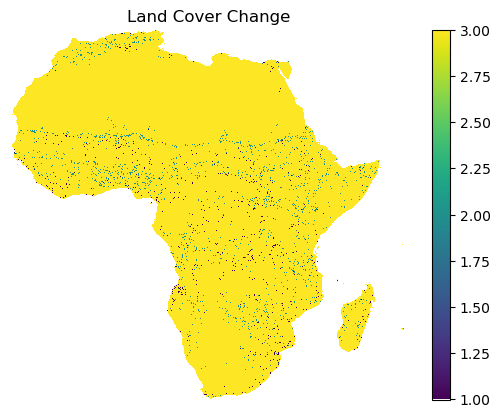

In [4]:
f, ax = plt.subplots()
LC.plot.imshow()
ax.set(title="Land Cover Change")
ax.set_axis_off()
plt.show()

In [5]:
# Load vector files
east_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/EasternAfrica.shp')
south_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/SouthAfrica.shp')
north_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/NorthAfrica.shp')
west_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/WesternAfrica.shp')
central_afr = gpd.read_file('F:/OSSDATA/Shapefiles/Dissolved/CentralAfrica.shp')

In [7]:
# Clip raster layers
EA = LC.rio.clip(east_afr.geometry.apply(mapping))

SA = LC.rio.clip(south_afr.geometry.apply(mapping))

NA = LC.rio.clip(north_afr.geometry.apply(mapping))

WA = LC.rio.clip(west_afr.geometry.apply(mapping))

CA = LC.rio.clip(central_afr.geometry.apply(mapping))

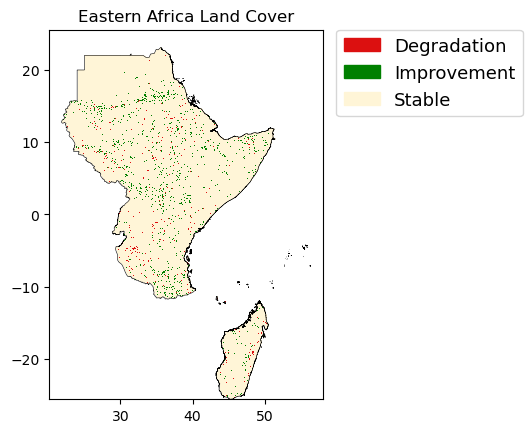

<Figure size 640x480 with 0 Axes>

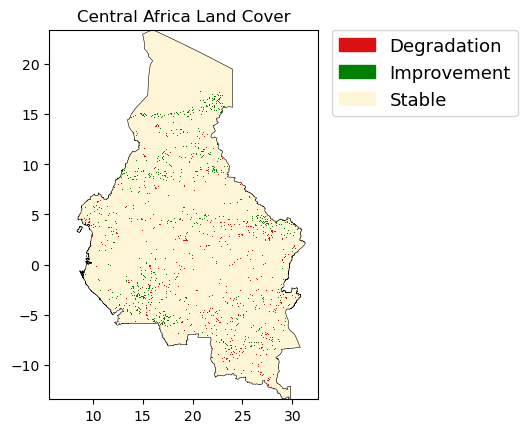

<Figure size 640x480 with 0 Axes>

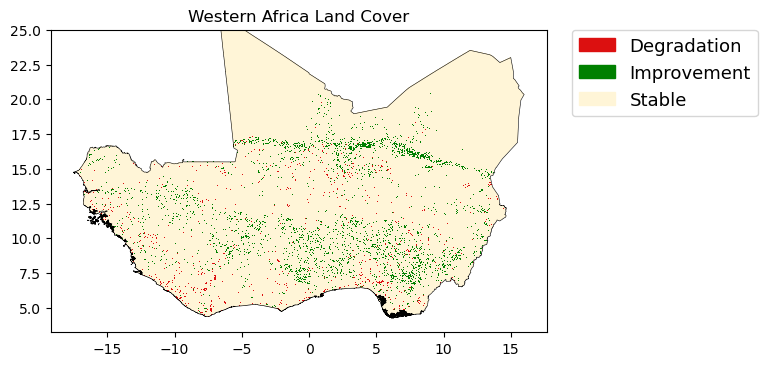

<Figure size 640x480 with 0 Axes>

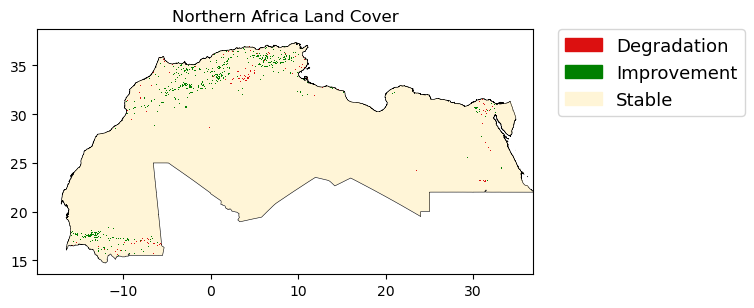

<Figure size 640x480 with 0 Axes>

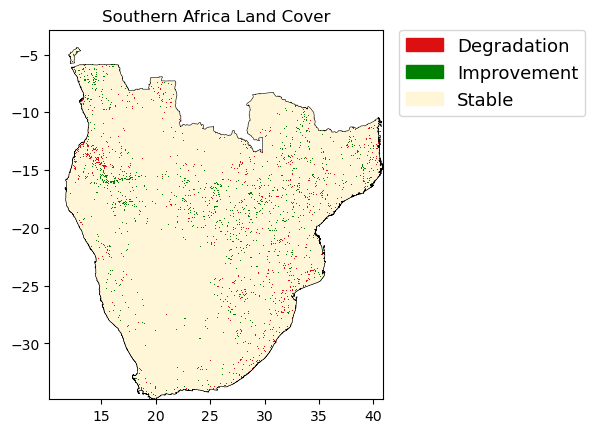

<Figure size 640x480 with 0 Axes>

In [10]:
def Maps (rst, vct, ttl, name):

    # Create a list of labels to use for your legend
    height_class_labels = ["Degradation", "Improvement", "Stable"]

    # Create a colormap from a list of colors
    colors = ["#dc1010", "green",  "#fff5d7",]

    cmap = ListedColormap(colors)

    # class_bins = [-1, 1, 5]
    # norm = BoundaryNorm(class_bins,
    #                     len(colors))

    # Plot newly classified and masked raster
    f, ax = plt.subplots()
    im = rst.plot.imshow(cmap=cmap, 
    #                     norm=norm, 
                        add_colorbar=False)
    vct.geometry.boundary.plot(color=None,edgecolor='k',linewidth = .4,ax=ax)
    # Add legend using earthpy
    ep.draw_legend(im,
                   titles=height_class_labels)
    ax.set(title=ttl)
    # ax.set_axis_off()
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.show()
    plt.tight_layout()
    
    # Export the images
    outpath = r'D:/OSS_2/Scripts/Maps2/'
    path = os.path.join(os.path.join(outpath, name + '.svg'))
    f.savefig(path, format = 'svg', dpi=1200, bbox_inches='tight')

# Call the function
Maps(EA, east_afr, "Eastern Africa Land Cover", "Eastern Land Cover Change")
Maps(CA, central_afr, "Central Africa Land Cover", "Central Land Cover Change")
Maps(WA, west_afr, "Western Africa Land Cover", "Western Land Cover Change")
Maps(NA, north_afr, "Northern Africa Land Cover", "Northern Land Cover Change")
Maps(SA, south_afr, "Southern Africa Land Cover", "Southern Land Cover Change")